718902/718902 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 807ms/step


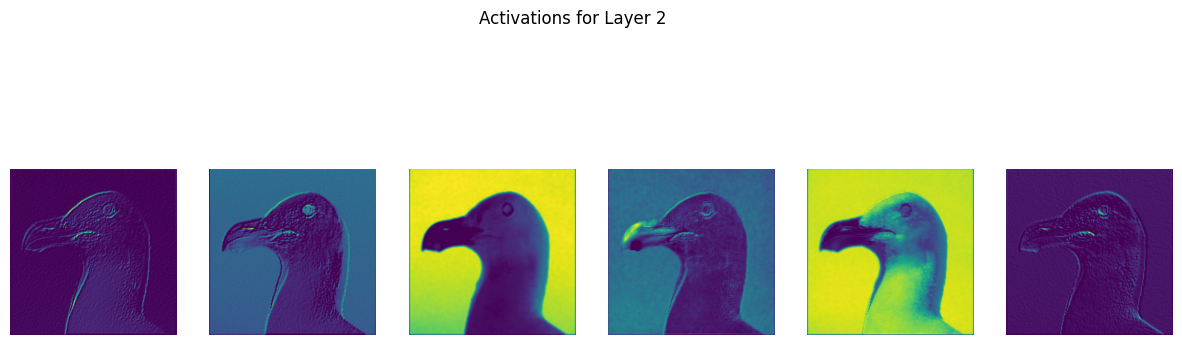

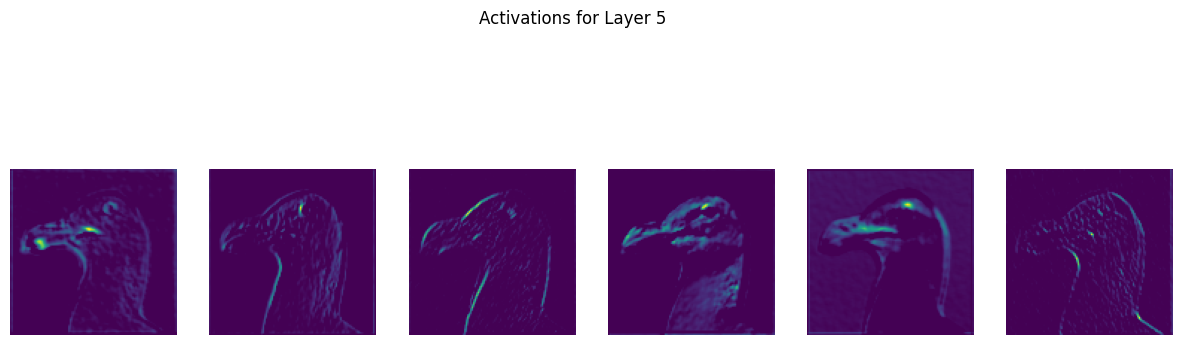

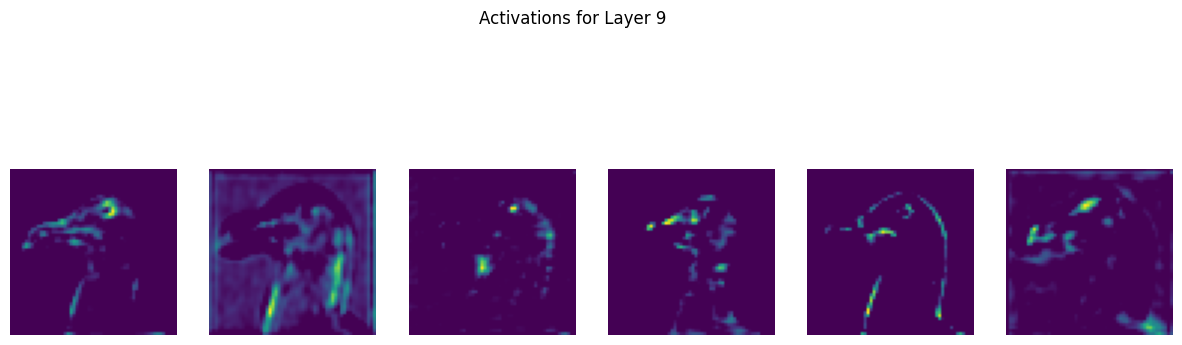

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

def load_model():
    """Loads the pre-trained VGG16 model."""
    model = VGG16(weights='imagenet', include_top=False)
    return model

def get_sample_image():
    """Loads a sample image properly from an accessible source."""
    img_url = "https://upload.wikimedia.org/wikipedia/commons/9/9a/Gull_portrait_ca_usa.jpg"
    img_path = tf.keras.utils.get_file("sample_image.jpg", img_url)
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array


def get_activation_maps(model, img_array, layer_indices=[2, 5, 9]):
    """Extracts activation maps from specified convolutional layers."""
    layer_outputs = [model.layers[i].output for i in layer_indices]
    activation_model = Model(inputs=model.input, outputs=layer_outputs)
    activations = activation_model.predict(img_array)
    return activations

def visualize_activations(activations, layer_indices):
    """Plots activation maps for each selected layer."""
    for layer_index, activation in zip(layer_indices, activations):
        num_filters = activation.shape[-1]
        size = activation.shape[1]

        fig, axes = plt.subplots(1, min(num_filters, 6), figsize=(15, 5))  # Show up to 6 feature maps
        fig.suptitle(f"Activations for Layer {layer_index}")

        for i in range(min(num_filters, 6)):
            ax = axes[i]
            ax.imshow(activation[0, :, :, i], cmap='viridis')
            ax.axis('off')
        plt.show()

if __name__ == "__main__":
    model = load_model()
    img_array = get_sample_image()
    layer_indices = [2, 5, 9]  # Change based on your CNN model
    activations = get_activation_maps(model, img_array, layer_indices)
    visualize_activations(activations, layer_indices)